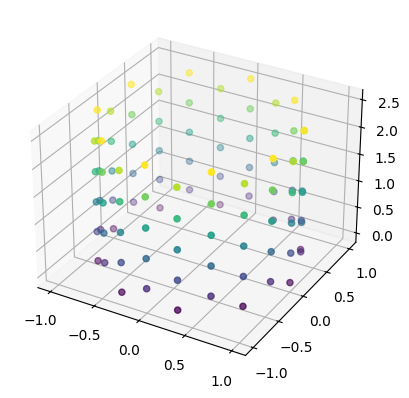

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

def xyz_location_on_layer(total_points, total_layers, radius = 1, height = 1):
    theta = np.array(np.linspace(0,2*np.pi, num=total_points, endpoint=False))
    x = np.zeros([total_layers, total_points])
    y = np.zeros([total_layers, total_points])
    z = np.zeros([total_layers, total_points])
    for layer_number in np.arange(total_layers):
        offset_angle = 0 if layer_number % 2 == 0 else np.pi/total_points
        x[layer_number,:] = radius*np.cos(theta + offset_angle)
        y[layer_number,:] = radius*np.sin(theta + offset_angle)
        z[layer_number,:] = layer_number/(total_layers-1)*height*np.ones(total_points)

    return x, y, z

radius = 1
height = 2.5
Npoints_per_layer = 10
Nlayers = 10

xx, yy, zz = xyz_location_on_layer(Npoints_per_layer,Nlayers, radius, height)

xx = np.resize(xx, [1,Nlayers*Npoints_per_layer])[0]
yy = np.resize(yy, [1,Nlayers*Npoints_per_layer])[0]
zz = np.resize(zz, [1,Nlayers*Npoints_per_layer])[0]

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.plot_wireframe(xx, yy, zz,  rstride=1, cstride=1, edgecolor='red')
ax.scatter(np.resize(xx, [1,Nlayers*Npoints_per_layer])[0], np.resize(yy, [1,Nlayers*Npoints_per_layer])[0], np.resize(zz, [1,Nlayers*Npoints_per_layer])[0],
                cmap='viridis', c=np.resize(zz, [1,Nlayers*Npoints_per_layer])[0]);


# Now, let's generate a list of vertices.

vertices = np.zeros([Nlayers*Npoints_per_layer, 3])

for vertex in np.arange(Nlayers*Npoints_per_layer):
    vertices[vertex, :] = [xx[vertex], yy[vertex], zz[vertex]]

vertices.shape


# Now do the faces.... 
# * first layer just needs to connect to the one above, 
# * all others except the last need to connect above and below. 
# * Last only needs to connect below.

faces = np.zeros([(Nlayers-1)*Npoints_per_layer*2,3])
index = 0

for layer_index in np.arange(Nlayers):
    for in_layer_index in np.arange(Npoints_per_layer):
        # Connect to the layer above
        if (layer_index < Nlayers - 1):
            first_point_index = in_layer_index
            # Want to wrap around back to the first point when we get to the end of this layer
            second_point_index = (in_layer_index + 1) % Npoints_per_layer
            # Need a point in the layer above
            third_point_index = (first_point_index + Npoints_per_layer + (layer_index % 2)) % Npoints_per_layer + Npoints_per_layer
            faces[index, :] = [first_point_index, second_point_index, third_point_index] + layer_index*Npoints_per_layer
            index = index + 1
        # Connect to the layer below
        if (layer_index != 0):
            first_point_index = in_layer_index
            second_point_index = (in_layer_index - 1) % Npoints_per_layer
            third_point_index = (first_point_index - Npoints_per_layer + (layer_index % 2) - 1) % Npoints_per_layer - Npoints_per_layer
            faces[index, :] = [first_point_index, second_point_index, third_point_index] + layer_index*Npoints_per_layer
            index = index + 1

from stl import mesh

shape = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        shape.vectors[i][j] = vertices[int(f[j]), :]

shape.save(f"schwarz_lantern_{Npoints_per_layer:03d}_{Nlayers:03d}_{radius}_{height}.stl")
            

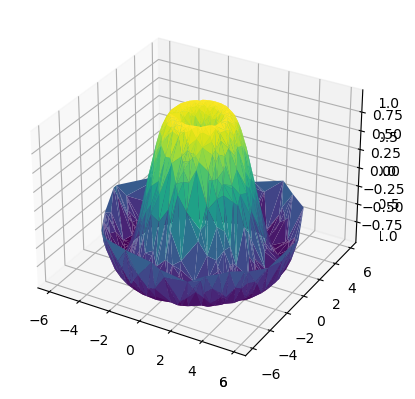

In [57]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))



theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)




ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);



ax2 = plt.axes(projection='3d')
ax2.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');






In [59]:
import numpy as np
from stl import mesh

vertices = np.array([
    [0,0,1], #0
    [0,1,1], #1
    [1,1,1], #2
    [1,0,1], #3
    [0,0,0], #4
    [0,1,0], #5 
    [1,1,0], #6
    [1,0,0], #7
    [3,3,0], #8
    [3,2,0], #9
    [0,1,-3], #10
    [3,3,-3], #11
    [4,2,0], #12
    [0,0,-2], #13
    [1,0,-2], #14
    [0,0,-3], #15
    [3,2,-3], #16
    [3,2,-2], #17
    [4,2,-2], #18
])

faces = np.array([
    [0,2,1],
    [0,3,2],
    
    [0,1,5],
    [0,5,4],
    
    [5,1,2],
    [5,2,6],
    
    [3,6,2],
    [3,7,6],
    
    [0,4,7],
    [0,7,3],
    
    [6,8,5],
    [6,9,8],
    
    [5,8,11],
    [5,11,10],
    
    [6,7,12],
    [6,12,9],
    
    [4,13,14],
    [4,14,7],
    
    [4,10,15],
    [4,5,10],
    
    [8,16,11],
    [8,9,16],
    
    [9,12,18],
    [9,18,17],
    
    [7,18,12],
    [7,14,18],
    
    [13,17,18],
    [13,18,14],
    
    [13,15,16],
    [13,16,17],
    
    [15,10,11],
    [15,11,16],
])

shape = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        shape.vectors[i][j] = vertices[f[j], :]

shape.save("parallelepipeds.stl")

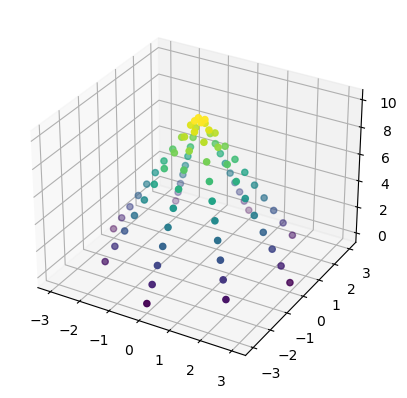

In [1]:
# Let's try a cone

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

def xyz_location_on_layer(total_points, total_layers, radius = 1, height = 1):
    theta = np.array(np.linspace(0,2*np.pi, num=total_points, endpoint=False))
    x = np.zeros([total_layers, total_points])
    y = np.zeros([total_layers, total_points])
    z = np.zeros([total_layers, total_points])
    for layer_number in np.arange(total_layers):
        offset_angle = 0 if layer_number % 2 == 0 else np.pi/total_points
        x[layer_number,:] = (total_layers-layer_number)/total_layers*radius*np.cos(theta + offset_angle)
        y[layer_number,:] = (total_layers-layer_number)/total_layers*radius*np.sin(theta + offset_angle)
        z[layer_number,:] = layer_number/(total_layers-1)*height*np.ones(total_points)

    return x, y, z

radius = 3
height = 10
Npoints_per_layer = 4
Nlayers = 20

xx, yy, zz = xyz_location_on_layer(Npoints_per_layer,Nlayers, radius, height)

xx = np.resize(xx, [1,Nlayers*Npoints_per_layer])[0]
yy = np.resize(yy, [1,Nlayers*Npoints_per_layer])[0]
zz = np.resize(zz, [1,Nlayers*Npoints_per_layer])[0]

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.plot_wireframe(xx, yy, zz,  rstride=1, cstride=1, edgecolor='red')
ax.scatter(np.resize(xx, [1,Nlayers*Npoints_per_layer])[0], np.resize(yy, [1,Nlayers*Npoints_per_layer])[0], np.resize(zz, [1,Nlayers*Npoints_per_layer])[0],
                cmap='viridis', c=np.resize(zz, [1,Nlayers*Npoints_per_layer])[0]);


# Now, let's generate a list of vertices.

vertices = np.zeros([Nlayers*Npoints_per_layer, 3])

for vertex in np.arange(Nlayers*Npoints_per_layer):
    vertices[vertex, :] = [xx[vertex], yy[vertex], zz[vertex]]

vertices.shape


# Now do the faces.... 
# * first layer just needs to connect to the one above, 
# * all others except the last need to connect above and below. 
# * Last only needs to connect below.

faces = np.zeros([(Nlayers-1)*Npoints_per_layer*2,3])
index = 0

for layer_index in np.arange(Nlayers):
    for in_layer_index in np.arange(Npoints_per_layer):
        # Connect to the layer above
        if (layer_index < Nlayers - 1):
            first_point_index = in_layer_index
            # Want to wrap around back to the first point when we get to the end of this layer
            second_point_index = (in_layer_index + 1) % Npoints_per_layer
            # Need a point in the layer above
            third_point_index = (first_point_index + Npoints_per_layer + (layer_index % 2)) % Npoints_per_layer + Npoints_per_layer
            faces[index, :] = [first_point_index, second_point_index, third_point_index] + layer_index*Npoints_per_layer
            index = index + 1
        # Connect to the layer below
        if (layer_index != 0):
            first_point_index = in_layer_index
            second_point_index = (in_layer_index - 1) % Npoints_per_layer
            third_point_index = (first_point_index - Npoints_per_layer + (layer_index % 2) - 1) % Npoints_per_layer - Npoints_per_layer
            faces[index, :] = [first_point_index, second_point_index, third_point_index] + layer_index*Npoints_per_layer
            index = index + 1

from stl import mesh

shape = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        shape.vectors[i][j] = vertices[int(f[j]), :]

shape.save(f"schwarz_cone_{Npoints_per_layer:03d}_{Nlayers:03d}_{radius}_{height}.stl")
            